Sequence 1:
GTGAAGGCTGAGAGGTGGCGGGAACCCCACTTCAGAGGCGATCTCCCCGCACACAAAAACCACCCCTGAGTAAGAGCAAAAGGCACTTCACAAACCGCAACCATGAATGGGACAGAAGGCCAGGACTTCTACGTGCCCATGTCCAACAAGACCGGGGTGGTGCGGAGCCCCTTCGAGTACCCCCAGTACTACCTGGCTGAGCCCTGGAAGTTCTCGGCGCTGGCTGCCTACATGTTCATGCTGATCCTGCTCGGCTTCCCCATCAACTTCCTCACGCTGTACGTTACCATCCAGCACAAGAAGCTCCGGACGCCTCTAAATTATATCCTTCTGAACCTGGCGGTCGCCAACCTCTTCATGGTCTTTGGAGGCTTCACGACCACCATGTACACTTCAATGAACGGGTATTTTGTCTTTGGAGTAACAGGGTGCTACATTGAAGGCTTCTTTGCTACACTGGGCGGTGAAATTGCTCTCTGGTCGCTGGTTGTCCTGGCTGTTGAAAGATACGTAGTGGTCTGCAAGCCCATGAGCAACTTCCGCTTCGGGGAGAACCATGCCATCATGGGCGTTGCCTTCTCCTGGATCATGGCCTTCGCGTGTGCAGGCCCTCCGCTGTTTGGCTGGTCCAGGTACATCCCCGAGGGCATGCAGTGCTCGTGCGGGATCGACTATTACACTCTGAAGCCAGAGATCAACAACGAGTCTTTCGTCGTCTACATGTTTGTGGTTCACTTCATGATCCCGCTGATGGTCATTTTCTTCTGCTATGGGAACCTGGTTTGCACTGTCAAGGAGGCTGCTGCCCAGCAGCAGGAGTCTGCCACCACCCAGAAGGCAGAGAAAGAAGTGACCCGCATGGTCGTCATCATGGTCATCGCCTTCCTGATCTGCTGGGTCCCCTACGCCAGCGTTGCTTTCTACATCTTCACCAACCAGGGGTCGGACTTCGGGCCCATCTTCATGACCATCCCGGCTTTCTTTGCCA

,Nucleotide,Frequency
0,A,279
1,T,307
2,C,345
3,G,423


Sequence 1:
CCTGGAGCTTACCCCAGGGGGCACTTTATAAAGGGCGCCCTGCAGAGGTGAGTGTAGCCACTTCTTGGGGTGACGGCGAAGGCTGAGAGGTGGCGGGAGCCCCACTTCAGAAGCGATCCCCCCGCACTCCAAAGAAACCCCTGAGTAAGAGCAAAAGGCACCTCACAAACCGCAACCATGAATGGAACAGAAGGCCAAGACTTCTACATACCCATGTCCAACAAGACCGGGGTGGTGCGGAGCCCCTTCGAGTACCCCCAGTACTACCTGGCTGAGCCCTGGAAGTTCTCGGCGCTGGCTGCCTACATGTTCATGCTGATCCTGCTCGGCTTCCCCATCAACTTCCTCACGCTGTACGTCACCATCCAGCACAAGAAGCTCCGGACGCCTCTAAACTACATCCTTCTGAACCTGGCGGTCGCTGACCTCTTCATGGTCTTAGGAGGCTTCACGACCACCATGTACACTTCGATGAACGGGTACTTTGTCTTTGGAGTAACAGGGTGCTACATCGAAGGCTTCTCTGCTACACTGGGCGGTGAAATTGCTCTCTGGTCCCTGGTGGTCCTGGCTATCGAAAGATACATAGTGGTCTGCAAGCCCATGAGCAACTTCCGCTTCGGGGAGAACCACGCCATCATGGGCGTTGCCTTCACCTGGATCATGGCCTTGGCCTGCGCGGCTCCCCCGCTCTTCGGCTGGTCCAGGTACATCCCCGAGGGCATGCAGTGCTCGTGTGGAATTGACTACTACACGCTGAAGCCAGAGATCAACAACGAATCTTTTGTCATCTACATGTTCGTGGTTCACTTCATGATCCCGCTGACAGTCATTTTCTTCTGCTATGGGAACCTGGTTTGCACCGTCAAGGAGGCCGCTGCCCAGCAGCAGGAGTCTGCCACCACCCAGAAGGCCGAGAAGGAAGTGACCCGCATGGTCATCATCATGGTCGTCGCCTTCCTGATTTGCTGGGTCCCCTACGCCAGCG

,Nucleotide,Frequency
0,A,274
1,T,276
2,C,311
3,G,397


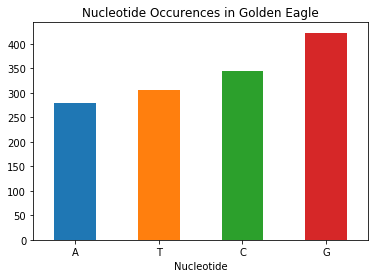

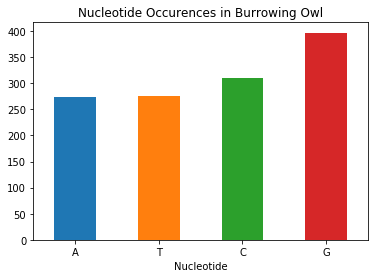

In [42]:
from Bio import Align
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import pandas as pd 


# Function read sequences from a file as a string and initializes 
# two seperate string variables to compare 
def import_seq():
    global seq1_eagle
    seq1_eagle = SeqIO.read("gene_nuccore_refseqrna_RHO_GOLDEN_EAGLE.fasta", "fasta")
    global seq2_owl 
    seq2_owl = SeqIO.read("gene_nuccore_refseqrna_RHO_BURROWING_OWL.fasta", "fasta")

# Function that finds the GC content of a DNA sequence 
# assuming the seq passed in is without flaws (no extra spaces or error base pairs)
def find_gc_content(dna_seq):
      g_count = dna_seq.count("G")
      c_count = dna_seq.count("C")
      answer = ((g_count + c_count)/len(dna_seq)) * 100
      
      return round(answer, 2)
  
# TO-DO
# Function that initalized the 2D array that will hold the 'scores' for the 
# Needleman-Wunsch algorithm 
def init_matrix(seq_1, seq_2): 
    matrix = []

# Function uses Biopython lilbrary  to find alignment between two nucleotide sequences. 
def find_gaps(seq1, seq2): 
    alignments = pairwise2.align.globalxx(seq1, seq2)
    print(format_alignment(*alignments[0]))
    
        
        
# Print basic comparing information about sequences 
def print_basic_info(seq, name): 
    seq_length = len(seq)
    gc_content = find_gc_content(seq)
    a_count = seq.count("A")
    t_count = seq.count("T")
    g_count = seq.count("G")
    c_count = seq.count("C")
    
    print("Sequence 1:\n"+ seq, "\n\n" +
      "Length:", str(seq_length) + "\n" + 
      "GC Content:", str(gc_content) + "%" + "\n" + 
      "A count:", str(a_count) +"\n" + 
      "T count:", str(t_count) + "\n" +
      "G count:", str(g_count) + "\n" + 
      "C count:", str(c_count) + "\n")  
    
    display_counts_graph(a_count, t_count, g_count, c_count, name)
    
def display_counts_graph(a, t, g, c, name):
    title = str("Nucleotide Occurences in "+name)
    name = str(name+".png")
    data = pd.DataFrame({"Nucleotide": ["A", "T", "C", "G"], 
                        "Frequency": [a, t, g, c]})
    display(data)
    df = data.plot.bar(x = "Nucleotide", y = "Frequency", rot = 0, title = title, legend = False )
    table_fig = df.get_figure()
    table_fig.savefig(name)

             
def main(): 
    global seq1_eagle
    global seq2_owl
    
    import_seq() 
    print_basic_info(seq1_eagle.seq, "Golden Eagle")
    print_basic_info(seq2_owl.seq, "Burrowing Owl")
    
    #print("Markers where the sequences match up:")
    #find_gaps(seq1_eagle.seq, seq2_owl.seq)

if __name__ == '__main__':
    main()
